In [107]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
  
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use("ggplot")
%matplotlib inline

from __future__ import division

import seaborn as sns
sns.set_style("whitegrid")

pd.set_option("display.max_columns",15)
pd.set_option("display.max_rows",10)
pd.set_option("display.width",78)
pd.set_option("precision",4)

###
#pip install seaborn tushare  -i http://pypi.douban.com/simple --trusted-host pypi.douban.com

In [133]:
#tushare的官方网址http://tushare.waditu.com/trading.html#id2
import tushare as tsh

#分别是招商银行，建设银行，上证指数,浦发银行，民生银行
stock_list = {"zsyh":"600036","jsyh":"601939","szzs":"000001","pfyh":"600000","msyh":"600061"}

for stock,code in stock_list.items():
    globals()[stock] = tsh.get_hist_data(code,start="2015-01-01",end="2016-04-16")

zsyh

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2016-04-15,16.56,17.04,16.93,16.46,588337.69,0.47,2.85,16.494,16.362,16.228,342204.23,330956.10,315534.41,0.29
2016-04-14,16.50,16.68,16.47,16.37,229842.00,-0.01,-0.06,16.342,16.278,16.194,269416.30,298071.93,309153.10,0.11
2016-04-13,16.39,16.68,16.48,16.00,400469.41,0.19,1.17,16.266,16.252,16.192,282560.53,304763.21,359489.72,0.19
2016-04-12,16.41,16.41,16.28,16.12,174563.59,-0.03,-0.18,16.224,16.183,16.162,262611.81,284432.79,357226.50,0.08
2016-04-11,16.16,16.57,16.31,16.15,317808.47,0.15,0.93,16.238,16.141,16.135,306292.97,289114.02,364246.73,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01-09,15.56,16.56,15.71,15.36,4613635.00,0.14,0.90,16.108,15.820,15.181,3955037.20,4355847.58,4478019.33,2.24
2015-01-08,16.25,16.34,15.57,15.53,2929211.00,-0.59,-3.65,16.284,15.679,15.102,4366568.10,4293554.55,4520942.05,1.42
2015-01-07,16.20,16.56,16.16,15.94,2961696.00,-0.26,-1.58,16.306,15.625,14.975,4563117.60,4435441.90,4754227.70,1.44


In [125]:
#简单的查看一下前面五条信息
zsyh.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2016-04-15,16.56,17.04,16.93,16.46,588337.69,0.47,2.85,16.494,16.362,16.228,342204.23,330956.10,315534.41,0.29
2016-04-14,16.50,16.68,16.47,16.37,229842.00,-0.01,-0.06,16.342,16.278,16.194,269416.30,298071.93,309153.10,0.11
2016-04-13,16.39,16.68,16.48,16.00,400469.41,0.19,1.17,16.266,16.252,16.192,282560.53,304763.21,359489.72,0.19
2016-04-12,16.41,16.41,16.28,16.12,174563.59,-0.03,-0.18,16.224,16.183,16.162,262611.81,284432.79,357226.50,0.08
2016-04-11,16.16,16.57,16.31,16.15,317808.47,0.15,0.93,16.238,16.141,16.135,306292.97,289114.02,364246.73,0.15


In [22]:
#看一下有哪些字段
zsyh.columns

Index([u'open', u'high', u'close', u'low', u'volume', u'price_change',
       u'p_change', u'ma5', u'ma10', u'ma20', u'v_ma5', u'v_ma10', u'v_ma20',
       u'turnover'],
      dtype='object')

#### 字段说明 

    date：日期
    open：开盘价
    high：最高价
    close：收盘价
    low：最低价
    volume：成交量
    price_change：价格变动
    p_change：涨跌幅
    ma5：5日均价
    ma10：10日均价
    ma20: 20日均价
    v_ma5: 5日均量
    v_ma10: 10日均量
    v_ma20: 20日均量
    turnover:换手率[注：指数无此项]


In [23]:
zsyh.describe()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
count,308.0000,308.0000,308.0000,308.0000,308.0000,308.0000,308.0000,308.0000,308.0000,308.0000,308.0000,308.0000,308.0000,308.0000
mean,16.8976,17.2047,16.9100,16.6185,1637397.3170,0.0029,0.0482,16.9055,16.8954,16.8703,1669353.6607,1702535.4625,1775694.4113,0.7939
std,1.5436,1.6208,1.5430,1.4796,1535851.2001,0.4293,2.5026,1.5011,1.4712,1.4323,1434165.9174,1381440.5562,1335369.7212,0.7443
min,13.9200,14.0900,13.9100,13.8000,159292.9500,-1.8300,-9.9100,14.1820,14.3550,14.4000,201828.4500,244105.6100,280187.1000,0.0800
25%,15.5775,15.9000,15.6575,15.3500,449030.1025,-0.2000,-1.2225,15.6295,15.5448,15.4718,489134.8950,518795.8450,573951.5825,0.2175
50%,17.1700,17.4600,17.2300,16.9000,1123634.5600,-0.0200,-0.1400,17.3290,17.3580,17.3410,1234689.3700,1321622.9000,1387389.1950,0.5450
75%,18.0525,18.3400,18.1250,17.8200,2453991.9375,0.1700,1.0575,18.1150,18.0497,17.9930,2550222.7500,2642439.2550,2953106.0025,1.1900
max,21.1500,21.7000,21.1300,20.6100,9432932.0000,1.5700,10.0300,20.6200,20.1780,19.4990,7855522.0000,6116648.9300,5072807.5300,4.5700


In [110]:
zsyh.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308 entries, 2016-04-15 to 2015-01-05
Data columns (total 14 columns):
open            308 non-null float64
high            308 non-null float64
close           308 non-null float64
low             308 non-null float64
volume          308 non-null float64
price_change    308 non-null float64
p_change        308 non-null float64
ma5             308 non-null float64
ma10            308 non-null float64
ma20            308 non-null float64
v_ma5           308 non-null float64
v_ma10          308 non-null float64
v_ma20          308 non-null float64
turnover        308 non-null float64
dtypes: float64(14)
memory usage: 36.1+ KB


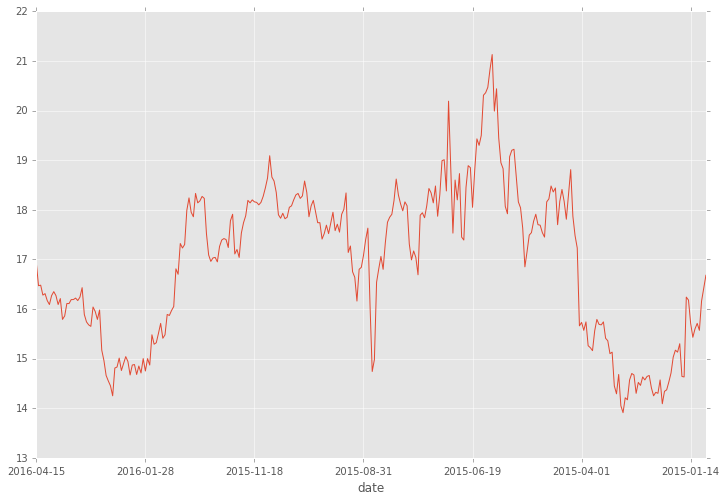

In [26]:
zsyh["close"].plot(figsize=(12,8))

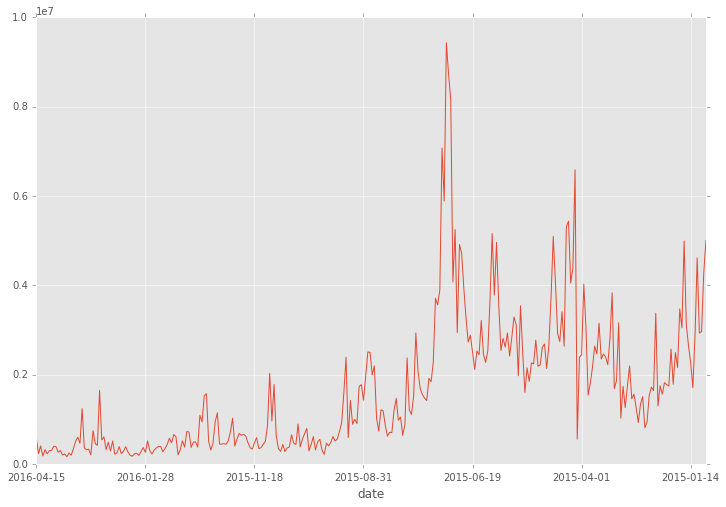

In [27]:
zsyh["volume"].plot(figsize=(12,8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D69B240>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000DC79240>], dtype=object)

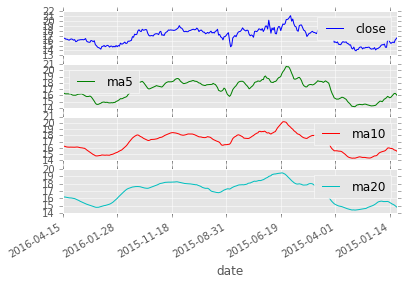

In [30]:
zsyh[["close","ma5","ma10","ma20"]].plot(subplots=True)

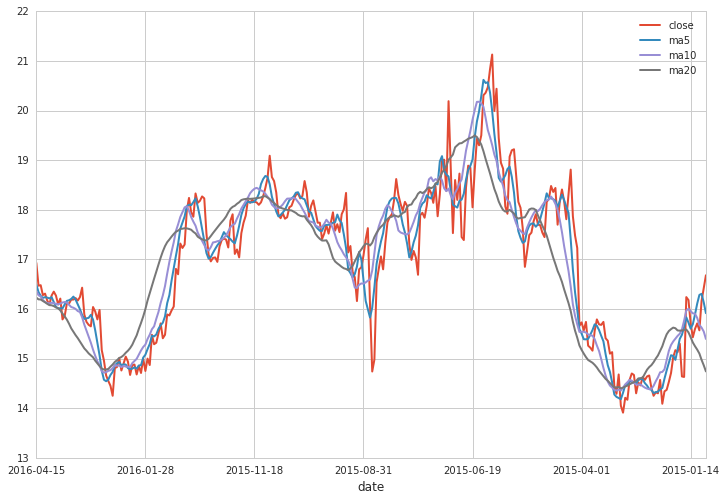

In [134]:
zsyh[["close","ma5","ma10","ma20"]].plot(figsize=(12,8),linewidth=2)

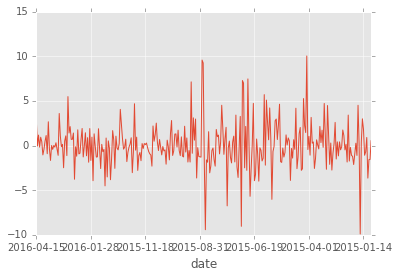

In [41]:
zsyh["p_change"].plot()

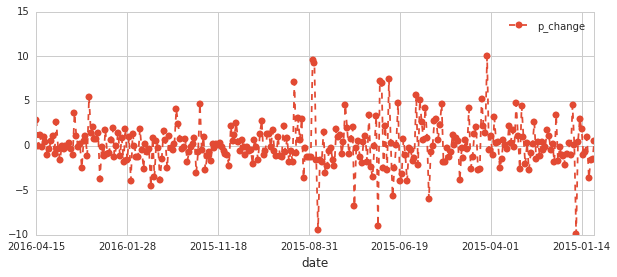

In [135]:
zsyh["p_change"].plot(figsize=(10,4),legend=True,linestyle="--",marker="o")

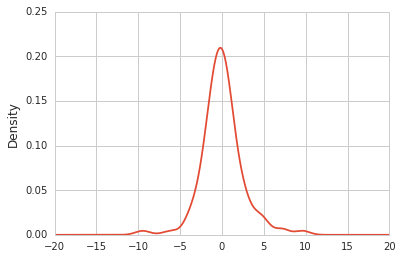

In [138]:

#zsyh["p_change"].hist(bins=20)
zsyh["p_change"].plot.kde()

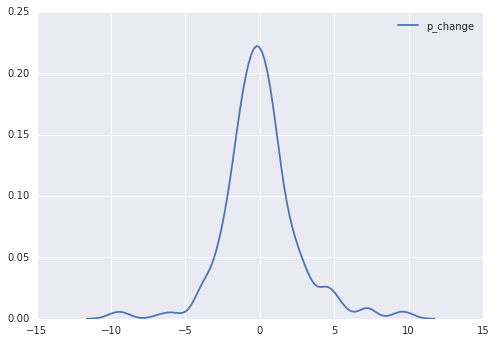

In [56]:
sns.kdeplot(zsyh["p_change"].dropna())

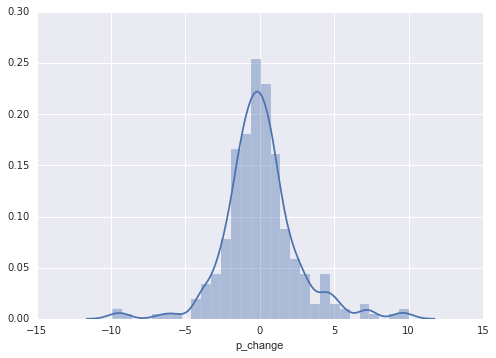

In [57]:
sns.distplot(zsyh["p_change"].dropna())

In [64]:
stock_list

{'jsyh': '601939',
 'msyh': '600061',
 'pfyh': '600000',
 'szzs': '000001',
 'zsyh': '600036'}

In [127]:
stock_list2 = stock_list.keys()
stock_list2
print stock_list2
sl = [globals()[st]["close"] for st in stock_list2]

df_close = pd.concat(sl,axis=1,join='inner')
df_close.columns = stock_list2
df_close

['msyh', 'szzs', 'jsyh', 'zsyh', 'pfyh']


,msyh,szzs,jsyh,zsyh,pfyh
date,,,,,
2016-04-15,18.93,10.88,4.83,16.93,17.89
2016-04-14,19.23,10.84,4.82,16.47,17.80
2016-04-13,19.23,10.81,4.82,16.48,17.75
2016-04-12,18.20,10.67,4.78,16.28,17.62
2016-04-11,18.57,10.72,4.80,16.31,17.69
...,...,...,...,...,...
2015-01-13,21.57,14.68,6.18,15.43,15.18
2015-01-12,21.40,14.77,6.25,15.60,15.22
2015-01-09,23.02,15.08,6.40,15.71,15.43


In [132]:


df_close.sort_index(ascending=True,inplace=True)
pc_ret = df_close.pct_change()
pc_ret

,msyh,szzs,jsyh,zsyh,pfyh
date,,,,,
2015-01-07,NaN,NaN,NaN,NaN,NaN
2015-01-08,-0.0304,-0.0336,-0.0422,-0.0365,-0.0354
2015-01-09,-0.0631,0.0080,0.0079,0.0090,0.0118
2015-01-12,-0.0704,-0.0206,-0.0234,-0.0070,-0.0136
2015-01-13,0.0079,-0.0061,-0.0112,-0.0109,-0.0026
...,...,...,...,...,...
2016-04-11,0.0492,0.0142,0.0084,0.0087,0.0045
2016-04-12,-0.0199,-0.0047,-0.0042,-0.0018,-0.0040
2016-04-13,0.0566,0.0131,0.0084,0.0123,0.0074


In [95]:
#平均值，可以了解这一年以来的总体态势
pc_ret.mean()

msyh    0.0024
szzs    0.0018
jsyh    0.0016
zsyh    0.0001
pfyh   -0.0001
dtype: float64

C:\Anaconda\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


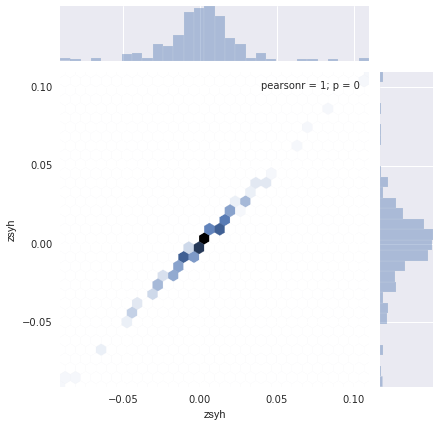

In [96]:
#建设银行与建设银行的关系
sns.jointplot("zsyh","zsyh",pc_ret,kind="hex")

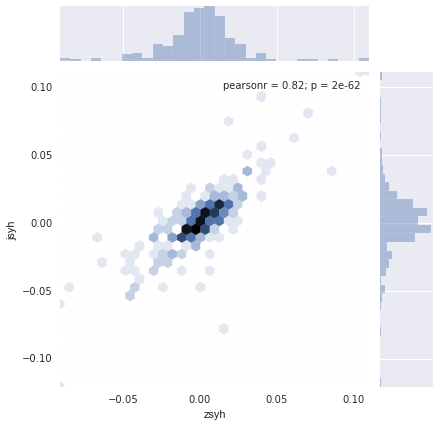

In [97]:
#招商银行与建设银行之间的关系
#皮尔逊相关系数 https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient
sns.jointplot("zsyh","jsyh",pc_ret,kind="hex")

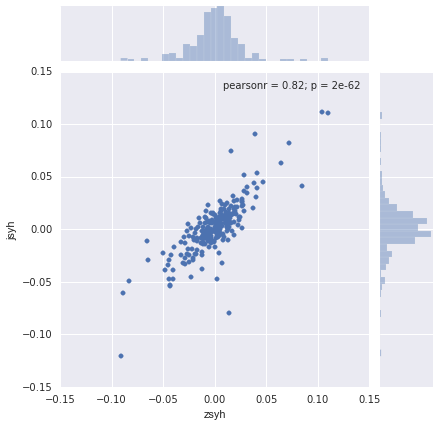

In [98]:
sns.jointplot("zsyh","jsyh",pc_ret,kind="scatter")

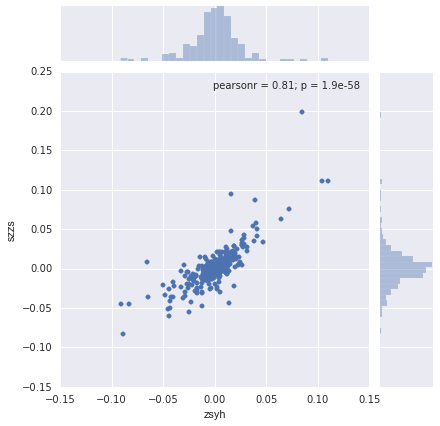

In [102]:
#招商银行与上证指数之间的关系
sns.jointplot("zsyh","szzs",pc_ret,kind="scatter")

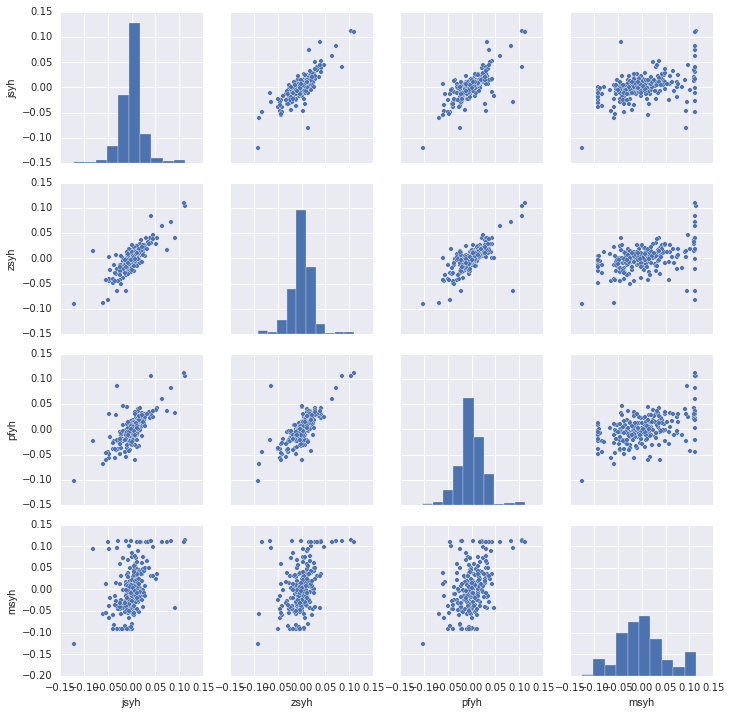

In [100]:
sns.pairplot(pc_ret[["jsyh","zsyh","pfyh","msyh"]].dropna())

In [101]:
###瞧瞧标准差，通过标注差可以了解该股票的摆动，即是否稳定
pc_ret.std()

msyh    0.0508
szzs    0.0276
jsyh    0.0248
zsyh    0.0243
pfyh    0.0270
dtype: float64

In [103]:
rets = pc_ret.dropna()
rets.mean()

msyh    0.0024
szzs    0.0018
jsyh    0.0016
zsyh    0.0001
pfyh   -0.0001
dtype: float64

In [105]:
rets.std()

msyh    0.0508
szzs    0.0276
jsyh    0.0248
zsyh    0.0243
pfyh    0.0270
dtype: float64

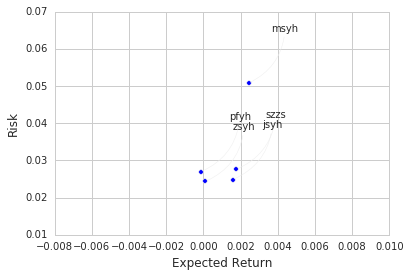

In [108]:
###点的大小
area = np.pi *20   
  
###分别以rets的平均值，标准差为xy轴
plt.scatter(rets.mean(),rets.std())   
  
###分别设定xy轴的标注
plt.xlabel("Expected Return")     
plt.ylabel("Risk")
  
for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
        label,
        xy = (x,y),xytext = (50,50),
        textcoords = "offset points",ha = "right",va = "bottom",
        arrowprops = dict(arrowstyle = "-",connectionstyle = "arc3,rad=-0.3"))